# **머신러닝- supervised Learning**
### process
- 1. data 준비 (load - dataset 나누기)
  2. model 선정
  3. model fit : fit()
  4. predict : predict()
  5. 성능평가 : +R^2, +Adjusted R^2, RMSE

# **Regression**
### 1. Simple Linear Regression : Boston 주택값 예측
- sklearn.linear_model 패키지의 Linear Regression 사용
- x변수(설명변수): 'RM'
- y변수(종속변수) : 주택가격

- sklearn.model_selection 패키지의 train_test_split() 사용 : train/test로 데이터 나눔


In [1]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### 패키지 불러오기

In [5]:
from sklearn import datasets
# from sklearn.datasets import load_boston # 논란땜에 삭제
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# boston 데이터 원본 가져오r
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

### dataset load

In [12]:
# from sklearn.datasets import load_boston

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [18]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
data = housing.data
label = housing.target
columns = housing.feature_names

In [20]:
data = pd.DataFrame(data, columns=columns)
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [21]:
# description 데이터 상세히 살펴보기
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

 - MedInc    :    median income in block group
- HouseAge    :  median house age in block group
- AveRooms    :  average number of rooms per household
- AveBedrms   :  average number of bedrooms per household
- Population  :  block group population
- AveOccup    :  average number of household members
- Latitude    :  block group latitude
- Longitude   :  block group longitude
- target : the median house value($100,000)

In [23]:
# price 컬럼을 df에 추가
data['PRICE'] = housing.target
print('california 데이터 세트 크기: ', data.shape)
data.head()

california 데이터 세트 크기:  (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
# price 컬럼을 df에 추가
data['PRICE2'] = housing.target*100
print('california 데이터 세트 크기: ', data.shape)
data.head()

california 데이터 세트 크기:  (20640, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,PRICE2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,452.6
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,358.5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,352.1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,341.3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,342.2


### Data type, null 개수 확인

In [24]:
data.info()
# 다 float64
# null값 없음...;;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 각 column이 주택 price에 미치는 영향 visualization

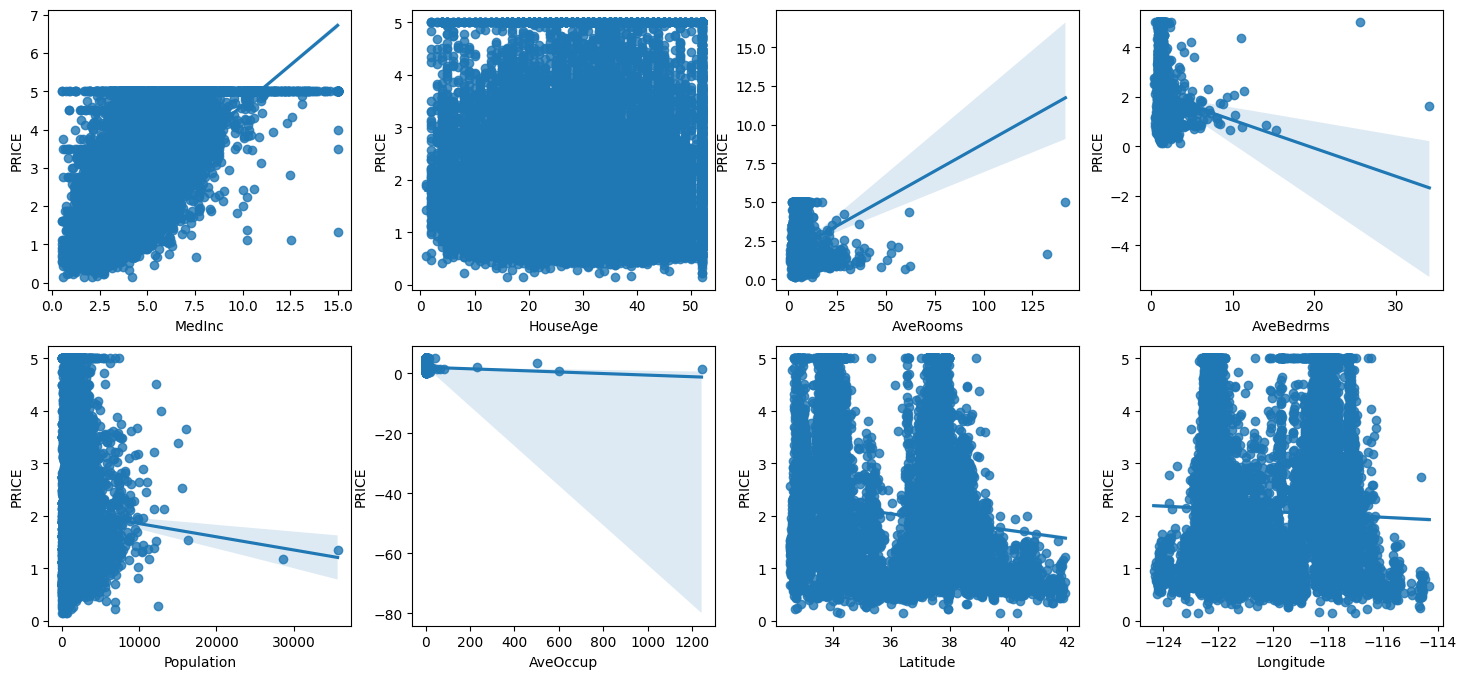

In [35]:
# 2개의 행과 4개의 열을 가진 subplots 이용
fig, axs = plt.subplots(figsize=(18,8), ncols=4, nrows=2)
lm_features =  ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude']

for i, feature in enumerate(lm_features):
    row = i//4  # 0 0 0 0 1 1 1 1
    col = i%4   # 0 1 2 3 0 1 2 3

    #seaborn.regplot 이용해서 산점도 + 선형회귀직선 같이 표현
    sns.regplot(x=feature, y='PRICE', data=data, ax=axs[row][col])

In [34]:
# 방의 개수 - 가격 양의 상관관계
# 침대 개수 - 가
# 먼가 데이터가 이상함..

### 데이터셋 나누기 - train/test

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020)

# 크기 확인 8:2
x_train.shape, x_test.shape

((16512, 10), (4128, 10))

### **1.단순선형회귀모델**
**x: AveRooms, y: PRICE**

### 1) model 불러오기, 정의

In [37]:
from sklearn.linear_model import LinearRegression

sim_lr = LinearRegression()

### 2) model 학습

In [38]:
sim_lr.fit(x_train['AveRooms'].values.reshape((-1, 1)), y_train)

LinearRegression()

### 3) 결과 예측(테스트 데이터)

In [41]:
y_pred = sim_lr.predict(x_test['AveRooms'].values.reshape((-1,1)))

In [42]:
# 예측 값
y_pred[:5]

array([2.02742705, 2.11684648, 2.19312163, 2.16541653, 1.9838118 ])

In [43]:
# result
y_test[:5]

array([2.35 , 3.868, 2.864, 1.201, 1.142])

In [ ]:
# residual가 좀 보임

### 4) 모델 평가: R2, RMSE

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

print('[캘리 주택가격 예측 simple linear regression]')
print('R2: {:.4f}'.format(r2_score(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # mse에 루트씌움

print('MSE : {0:.3f} , RMSE : {1:.3f}'.format(mse, rmse))


[캘리 주택가격 예측 simple linear regression]
R2: 0.0248
MSE : 1.321 , RMSE : 1.149


In [ ]:
# 변수 'AveRooms' 하나로 주택가격을 설명할수 있는 % : 2%

### 단순회귀 모델의 계수 w, 절편 b살펴보기

In [52]:
print('계수(w) : {:.1f}, 절편(b) : {:.4f}'.format(np.round(sim_lr.coef_[0],1), sim_lr.intercept_))

계수(w) : 0.1, 절편(b) : 1.6977


### 단순 선형 회귀식
- price = 0.1*RM + 1.6977

### 단순 선형 회귀 그래프 그리기

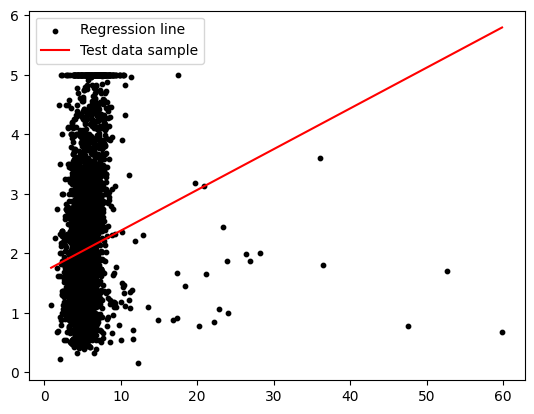

In [57]:
line_x = np.linspace(np.min(x_test['AveRooms']), np.max(x_test['AveRooms']),10)
line_y = sim_lr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['AveRooms'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

plt.show()

## **2. 다중선형회귀(Multiple Linear Regression)**

In [60]:
# 패키지 불러오기
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [61]:
# data load
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

data = housing.data
label = housing.target
columns = housing.feature_names

In [62]:
data = pd.DataFrame(data, columns = columns)
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


### train/test data

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020)

x_train.shape, x_test.shape

((16512, 8), (4128, 8))

### 다중선형회귀모델 
- x : 피쳐 전체(설명변수)
- y : PRICE

### 1) 모델 정의

In [65]:
from sklearn.linear_model import LinearRegression

mul_lr = LinearRegression()

### 2) 모델 학습

In [66]:
mul_lr.fit(x_train, y_train)

LinearRegression()

### 3) 결과 예측

In [67]:
y_pred = mul_lr.predict(x_test)

### 4) 모델 평가 : R2, RMSE

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

print('다중선형회귀')
print('R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))

다중선형회귀
R2 : 0.6078
MSE : 0.531, RMSE : 0.729


In [ ]:
# simple 
# R2: 0.0248
# MSE : 1.321 , RMSE : 1.149

# multiple
# R2 : 0.6078
# MSE : 0.531, RMSE : 0.729

# R2가 크게 증가함(1에 가까울수록 회귀모델이 데이터를 잘 표현한다는 뜻/예측정확도가 높다는 뜻)

### 다중회귀모델의 w, b살펴보기

In [70]:
# 계수 w 
mul_lr.coef_
# 거의 다 0에 가까운데...?

array([ 4.40832770e-01,  9.61642244e-03, -1.14781227e-01,  6.75973842e-01,
       -5.10337874e-06, -3.47558983e-03, -4.19478386e-01, -4.32477249e-01])

In [71]:
# 절편 b
mul_lr.intercept_

-36.7794431059448

In [72]:
# 회귀계쑤 큰 값 순으로 정렬( series 생성)
coeff = pd.Series(data=np.round(mul_lr.coef_,1), index=data.columns)
coeff.sort_values(ascending=False)

AveBedrms     0.7
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

### 최종 다중선형회귀식

- PRICE = -36.7794431059448 + 0.7AveBedrms + 0.4 MedInc + 0.0 HouseAge +...

## **K-Fold 검증 K=5**

- neg_mean_squared_error : 
- 파이썬의 sckitlearn의 score는 회귀보다 분류에 맞춰져있다.
  - 분류의 경우 높으면 높을 수록 좋다.

- 회귀의 경우 rmse가 낮으면 낮을수록 좋다.

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = housing.target
x_data = housing.data
lr = LinearRegression()

# 5 fold로 mse / rmse구하기
neg_mes_scores = cross